# Imports Libraries

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import date, datetime
%matplotlib inline

# Load data

In [2]:
df = pd.read_csv("/Users/lea.naccache/CODE/cercle_formation/la-haute-borne-data-2017-2020.csv", sep=";")

In [3]:
df.describe()

,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
count,215636.000000,215636.000000,215636.000000,215636.000000,215639.000000,215639.00000,215639.000000,215639.000000,215639.000000,215639.000000,...,0.0,0.0,33931.000000,0.0,0.0,0.0,33931.000000,0.0,0.0,0.0
mean,12.018144,10.838804,13.666945,0.936870,19.490556,19.30385,19.697785,0.100994,1088.096656,971.827998,...,NaN,NaN,173.004551,NaN,NaN,NaN,173.004551,NaN,NaN,NaN
std,25.365769,25.106044,26.108283,4.000833,6.685216,6.66859,6.691840,0.193629,605.395614,576.448215,...,NaN,NaN,86.065035,NaN,NaN,NaN,86.065035,NaN,NaN,NaN
min,-1.530000,-27.570000,-1.020000,0.000000,1.780000,1.00000,2.000000,0.000000,-574.890000,-574.950000,...,NaN,NaN,0.010000,NaN,NaN,NaN,0.010000,NaN,NaN,NaN
25%,-0.990000,-1.000000,-0.990000,0.000000,14.000000,14.00000,14.120000,0.000000,964.630000,954.940000,...,NaN,NaN,90.075001,NaN,NaN,NaN,90.075001,NaN,NaN,NaN
50%,-0.970000,-0.990000,-0.490000,0.000000,19.000000,19.00000,19.000000,0.000000,1200.870000,1046.810100,...,NaN,NaN,192.080000,NaN,NaN,NaN,192.080000,NaN,NaN,NaN
75%,2.970000,-0.960000,13.380000,0.190000,24.090000,24.00000,25.000000,0.180000,1593.030000,1390.565050,...,NaN,NaN,236.399990,NaN,NaN,NaN,236.399990,NaN,NaN,NaN
max,132.480000,92.750000,163.230000,46.070000,215.000000,215.00000,215.000000,39.790000,1807.600000,1802.250000,...,NaN,NaN,360.000000,NaN,NaN,NaN,360.000000,NaN,NaN,NaN


In [4]:
df.shape

(217588, 138)

# Analysis 

In [12]:
df.keys()

Index(['Wind_turbine_name', 'Date_time', 'Ba_avg', 'Ba_min', 'Ba_max',
       'Ba_std', 'Rt_avg', 'Rt_min', 'Rt_max', 'Rt_std',
       ...
       'Wa_c_avg', 'Wa_c_min', 'Wa_c_max', 'Wa_c_std', 'Na_c_avg', 'Na_c_min',
       'Na_c_max', 'Na_c_std', 'year', 'month'],
      dtype='object', length=140)

In [5]:
df.Wind_turbine_name.value_counts()

R80736    54433
R80721    54433
R80711    54433
R80790    54289
Name: Wind_turbine_name, dtype: int64

(80, 120)

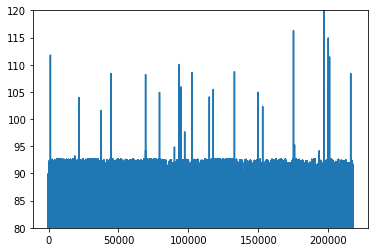

In [6]:
plt.plot(df.Ba_avg)
plt.ylim((80, 120))   # set the xlim to left, right


# Feature Engineering

### Select target

In [7]:
target = "Ba_avg"

In [8]:
df = df.dropna(subset=[target], axis=0)

### Create feature with time

In [9]:
df.Date_time

0         2017-02-08T08:00:00+01:00
1         2017-01-26T02:40:00+01:00
2         2017-01-26T13:50:00+01:00
3         2017-01-26T15:00:00+01:00
4         2017-02-18T01:10:00+01:00
                    ...            
217583    2017-12-13T23:10:00+01:00
217584    2017-12-14T03:30:00+01:00
217585    2017-12-14T04:20:00+01:00
217586    2017-12-14T05:10:00+01:00
217587    2017-12-14T05:50:00+01:00
Name: Date_time, Length: 215636, dtype: object

In [37]:
df['date'] = pd.to_datetime(df.Date_time, utc=True)

In [39]:
df['date'].dt.year

0         2017
1         2017
2         2017
3         2017
4         2017
          ... 
217583    2017
217584    2017
217585    2017
217586    2017
217587    2017
Name: date, Length: 215636, dtype: int64

In [42]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [50]:
def get_season(month):
    return (month%12 + 3)//3 

In [51]:
df['month'] 

0          2
1          1
2          1
3          1
4          2
          ..
217583    12
217584    12
217585    12
217586    12
217587    12
Name: month, Length: 215636, dtype: int64

In [52]:
df['season'] = df['month'].apply(lambda x : get_season(x))

In [55]:
df['season'].value_counts()

1    58499
2    52995
3    52610
4    51532
Name: season, dtype: int64

### remove columns with missing values 

In [7]:
df.isnull().sum()[df.isnull().sum() > 100000].count()

16

In [14]:
df.Date_time.isnull().sum()

0

In [8]:
X = df.drop(columns=["Wind_turbine_name", "Date_time", target, "Ba_min", "Ba_max", "Ba_std"])

In [10]:
X.isnull().sum()

Rt_avg           0
Rt_min           0
Rt_max           0
Rt_std           0
DCs_avg          0
             ...  
Wa_c_std    215636
Na_c_avg    181705
Na_c_min    215636
Na_c_max    215636
Na_c_std    215636
Length: 132, dtype: int64

In [11]:
X.isnull().sum()[X.isnull().sum() > 100000].count()

16

In [8]:
X = X.fillna(0)

In [9]:
y = df[target]

### Split Dataset into train and test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Random forest model

## Training 

In [13]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=6)

In [14]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=6, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Prediction 

In [16]:
y_pred_test = model.predict(X_test)
((y_pred_test - y_test) > 0.2).value_counts() / len(y_test)

False    0.915318
True     0.084682
Name: Ba_avg, dtype: float64

In [17]:
y_pred_train = model.predict(X_train)
((y_pred_train - y_train) > 0.2).value_counts() / len(y_train)

False    0.918215
True     0.081785
Name: Ba_avg, dtype: float64